In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import importlib
import functions
import numpy as np
import json
import seaborn as sns
from typing import List, Dict
import statsmodels.api as sm

In [2]:
from functions import gov_exp

In [3]:
importlib.reload(functions)
from functions import gov_exp, gov_exp_by_age

# getting data in a unique df

----------------------------------

with age

In [91]:
importlib.reload(functions)
from functions import getting_df_with_age, getting_df_without_age

In [80]:
df_aged = getting_df_with_age(with_interaction=False)

ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION
got all 'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION expenditures'
    year age_range  expenditures  quantities  \
0   2014      0-20  3.224066e+07     6892730   
1   2014     20-40  6.252095e+07     9713350   
2   2014     40-60  1.291837e+08    16774519   
3   2014     60-80  3.889858e+08    39429972   
4   2015      0-20  3.419775e+07     7051295   
5   2015     20-40  6.665927e+07     9899293   
6   2015     40-60  1.367052e+08    17166043   
7   2015     60-80  4.169989e+08    41227588   
8   2016      0-20  3.580858e+07     7144832   
9   2016     20-40  7.130325e+07    10265420   
10  2016     40-60  1.425425e+08    17457378   
11  2016     60-80  4.428851e+08    42312055   
12  2017      0-20  3.685842e+07     7271954   
13  2017     20-40  7.283771e+07    10510853   
14  2017     40-60  1.428643e+08    17636662   
15  2017     60-80  4.550014e+08    43400552   
16  2018      0-20  3.768921e+07     7310213   
17  2018     

In [81]:
df_aged.reset_index(inplace=True)

In [85]:
df_aged = df_aged.astype(int)

In [86]:
df_aged = df_aged.drop(columns=["index"])

In [87]:
df_aged.columns

Index(['expenditures', 'quantities',
       'ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS',
       'APPAREIL GENERATEUR D AEROSOL',
       'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION',
       'AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR',
       'DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS', 'DMI D ORIGINE SYNTHETIQUE',
       'FAUTEUILS ROULANTS', 'OPTIQUE MEDICALE', 'ORTHESES',
       'ORTHESES (PETIT APPAREILLAGE) (CHAP.1)', 'ORTHOPROTHESES(CHAP.7)',
       'PROTHESES EXTERNES NON ORTHOPEDIQUES',
       'PROTHESES OCULAIRES ET FACIALES', 'VEHICULES DIVERS', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '0-20',
       '20-40', '40-60', '60-80'],
      dtype='object')

In [92]:
df_without_age = getting_df_without_age(with_interaction=False)

ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION
got all 'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION expenditures'
   year  expenditures  nb_code_LPP  quantities  \
0  2014  6.137342e+08          311    73006128   
1  2015  6.550529e+08          310    75443983   
2  2016  6.927305e+08          455    77206441   
3  2017  7.077344e+08          492    78841101   
4  2018  7.429909e+08          458    80853840   
5  2019  7.606463e+08          426    81640803   
6  2020  7.712538e+08         1628    78630337   
7  2021  8.014656e+08         1710    81462236   
8  2022  8.251032e+08         1609    83234140   
9  2023  8.488299e+08         1599    84420477   

                                               group  
0  ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION  
1  ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION  
2  ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION  
3  ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION  
4  ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTIO

In [96]:
df_without_age = df_without_age.astype(int)

In [98]:
df_without_age.to_excel("df_for_reg-without_age_range.xlsx")

In [ ]:
#df_aged.to_excel("df_for_reg-with_age_range.xlsx")

# work on the data

## WITHOUT AGE

## OPTICAL FIELD

we don't put dental data on these regressions (optical and hearing) otherwise we would be obliged to drop 2014 data, that's useless.

#### Expenditures | reference : 2020

In [154]:
df = pd.read_excel("df_for_reg-without_age_range.xlsx", index_col=0)

In [155]:
for col in df.filter(like="20").columns:
    df[f"{col} x optical"] = df[f"{col}"] * df["OPTIQUE MEDICALE"]

In [156]:
X = df.drop(columns=(["expenditures", "nb_code_LPP", "quantities"] + [col for col in df.columns if "2020" in col or "audio" in col.lower()]))
X = sm.add_constant(X)
y = np.log(df["expenditures"])

In [157]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for optical field", yname="log(expenditures)"))

                     Linear regression for optical field                      
Dep. Variable:      log(expenditures)   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     194.7
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           3.50e-81
Time:                        18:49:17   Log-Likelihood:                 43.521
No. Observations:                 140   AIC:                            -23.04
Df Residuals:                     108   BIC:                             71.09
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

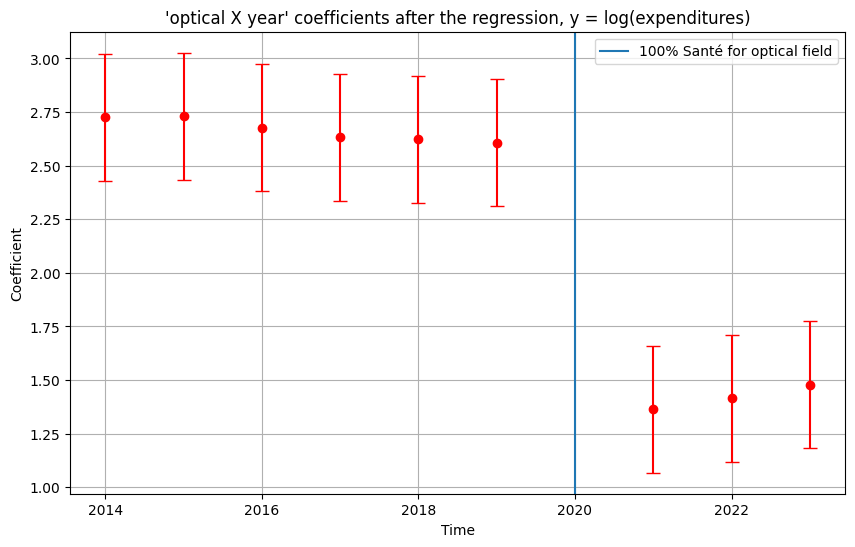

In [158]:
time_periods = [i+2014 for i in range(6)] + [i+2021 for i in range(3)]
coefficients = model.params[-9:]
std_errors = model.bse[-9:]

plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("'optical X year' coefficients after the regression, y = log(expenditures)")
plt.axvline(x=2020, label="100% Santé for optical field")
plt.grid(True)
plt.legend()

plt.show()

#### Quantities | reference : 2020

In [159]:
df = pd.read_excel("df_for_reg-without_age_range.xlsx", index_col=0)

In [160]:
for col in df.filter(like="20").columns:
    df[f"{col} x optical"] = df[f"{col}"] * df["OPTIQUE MEDICALE"]

In [161]:
X = df.drop(columns=(["expenditures", "nb_code_LPP", "quantities"] + [col for col in df.columns if "2020" in col or "audio" in col.lower()]))
X = sm.add_constant(X)
y = np.log(df["quantities"])

In [162]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for optical field", yname="log(quantities)"))

                     Linear regression for optical field                      
Dep. Variable:        log(quantities)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     680.6
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          3.71e-110
Time:                        18:49:23   Log-Likelihood:                 45.596
No. Observations:                 140   AIC:                            -27.19
Df Residuals:                     108   BIC:                             66.94
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

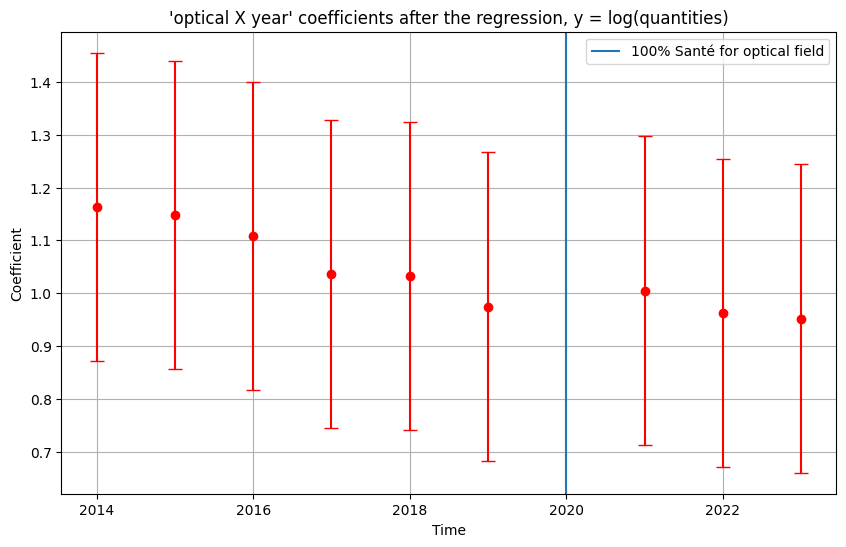

In [163]:
time_periods = [i+2014 for i in range(6)] + [i+2021 for i in range(3)]
coefficients = model.params[-9:]
std_errors = model.bse[-9:]

plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("'optical X year' coefficients after the regression, y = log(quantities)")
plt.axvline(x=2020, label="100% Santé for optical field")
plt.grid(True)
plt.legend()

plt.show()

---

## HEARING FIELD

#### Expenditures (on the entire field) | reference : 2020

In [164]:
df = pd.read_excel("df_for_reg-without_age_range.xlsx", index_col=0)

In [165]:
for col in df.filter(like="20").columns:
    df[f"{col} x hearing"] = df[f"{col}"] * df["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"]

In [166]:
X = df.drop(columns=(["expenditures", "nb_code_LPP", "quantities"] + [col for col in df.columns if "2020" in col or "optique" in col.lower()]))
X = sm.add_constant(X)
y = np.log(df["expenditures"])

In [167]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for hearing field", yname="log(expenditures)"))

                     Linear regression for hearing field                      
Dep. Variable:      log(expenditures)   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     83.87
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           4.11e-62
Time:                        18:51:21   Log-Likelihood:                -13.825
No. Observations:                 140   AIC:                             91.65
Df Residuals:                     108   BIC:                             185.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

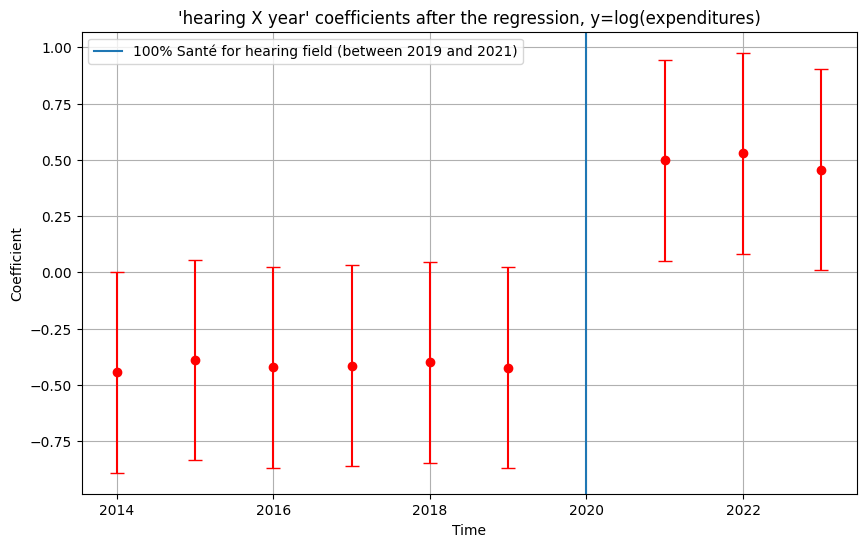

In [169]:
time_periods = [i+2014 for i in range(6)] + [i+2021 for i in range(3)]
coefficients = model.params[-9:]
std_errors = model.bse[-9:]

plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("'hearing X year' coefficients after the regression, y=log(expenditures)")
plt.axvline(x=2020, label="100% Santé for hearing field (between 2019 and 2021)")
plt.grid(True)
plt.legend()

plt.show()

#### Quantities (on the entire field) | reference : 2020

In [171]:
df = pd.read_excel("df_for_reg-without_age_range.xlsx", index_col=0)

In [172]:
for col in df.filter(like="20").columns:
    df[f"{col} x hearing"] = df[f"{col}"] * df["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"]

In [173]:
X = df.drop(columns=(["expenditures", "nb_code_LPP", "quantities"] + [col for col in df.columns if "2020" in col or "optique" in col.lower()]))
X = sm.add_constant(X)
y = np.log(df["quantities"])

In [174]:
model = sm.OLS(y, X).fit()
print(model.summary(title="Linear regression for optical field", yname="log(quantities)"))

                     Linear regression for optical field                      
Dep. Variable:        log(quantities)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     889.6
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          2.11e-116
Time:                        18:53:52   Log-Likelihood:                 64.257
No. Observations:                 140   AIC:                            -64.51
Df Residuals:                     108   BIC:                             29.62
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

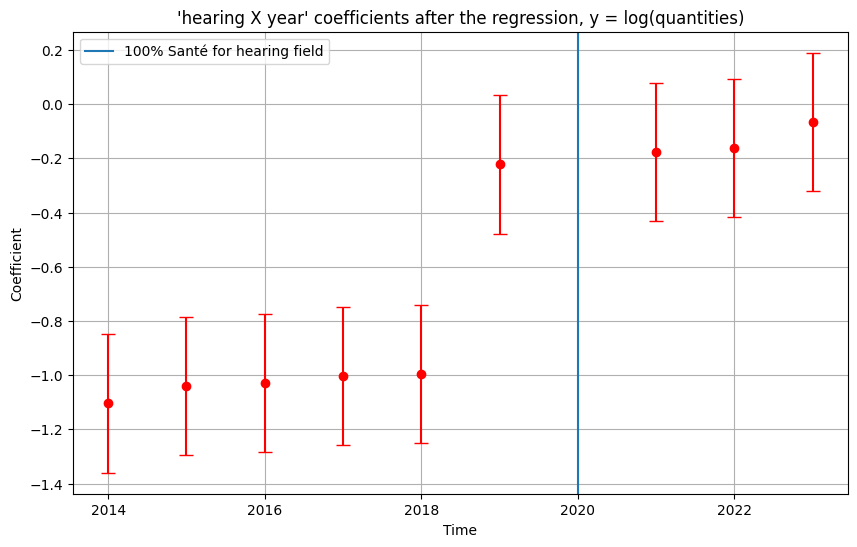

In [178]:
time_periods = [i+2014 for i in range(6)] + [i+2021 for i in range(3)]
coefficients = model.params[-9:]
std_errors = model.bse[-9:]

plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("'hearing X year' coefficients after the regression, y = log(quantities)")
plt.axvline(x=2020, label="100% Santé for hearing field")
plt.grid(True)
plt.legend()

plt.show()

----------------------------------------------

## WITH AGE RANGE

In [243]:
df_aged = pd.read_excel("df_aged_for_reg_30-10.xlsx", index_col=0)

In [244]:
df_aged = df_aged[df_aged["expenditures"]!=0]

In [245]:
len(df_aged)

557

In [246]:
df_aged = df_aged[df_aged["0-20"]!=1]

In [247]:
df_aged = df_aged.drop(columns=["0-20", "60-80"])

In [248]:
interact_columns = df_aged.filter(like="interact.").columns
dash_columns = [col for col in df_aged.columns if "-" in col]

for interact_col in interact_columns:
    for dash_col in dash_columns:
        df_aged[f"{interact_col}_{dash_col}"] = df_aged[interact_col] * df_aged[dash_col]

In [249]:
df_aged["expenditures"] = np.log(df_aged["expenditures"])
df_aged.head()

,expenditures,"ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS",APPAREIL GENERATEUR D AEROSOL,"ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION","AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR",DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS,DMI D ORIGINE SYNTHETIQUE,FAUTEUILS ROULANTS,OPTIQUE MEDICALE,ORTHESES,...,interact. optique x year2022_20-40,interact. optique x year2022_40-60,interact. (audio+optical) x year2022_20-40,interact. (audio+optical) x year2022_40-60,interact. audio x year2023_20-40,interact. audio x year2023_40-60,interact. optique x year2023_20-40,interact. optique x year2023_40-60,interact. (audio+optical) x year2023_20-40,interact. (audio+optical) x year2023_40-60
1,17.951012,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.676746,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19.779053,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,18.015105,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,18.733337,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# all

In [250]:
import statsmodels.api as sm

X = df_aged.drop(columns=(["expenditures"] + [col for col in df_aged.columns if "2014" in col] + [col for col in df_aged.columns if "year" in col and "-" not in col] + [col for col in df_aged.columns if "audio x" in col or "optique x" in col]))
X = sm.add_constant(X)
y = df_aged["expenditures"]

In [251]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           expenditures   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     73.69
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          6.90e-156
Time:                        17:25:14   Log-Likelihood:                -356.24
No. Observations:                 420   AIC:                             798.5
Df Residuals:                     377   BIC:                             972.2
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [252]:
_20_40 = [col for col in X.columns if "20-40" in col]
_20_40.remove("20-40")

_40_60 = [col for col in X.columns if "40-60" in col]
_40_60.remove("40-60")

#_60_80 = [col for col in X.columns if "60-80" in col]
#_60_80.remove("60-80")

In [253]:
params = pd.DataFrame(model.params)
std = pd.DataFrame(model.bse)

In [254]:
interact_20_40 = params[params.index.str.contains("_20-40")]
interact_40_60 = params[params.index.str.contains("_40-60")]
#interact_60_80 = params[params.index.str.contains("_60-80")]

interact_20_40_std = std[std.index.str.contains("_20-40")]
interact_40_60_std = std[std.index.str.contains("_40-60")]
#interact_60_80_std = std[std.index.str.contains("_60-80")]

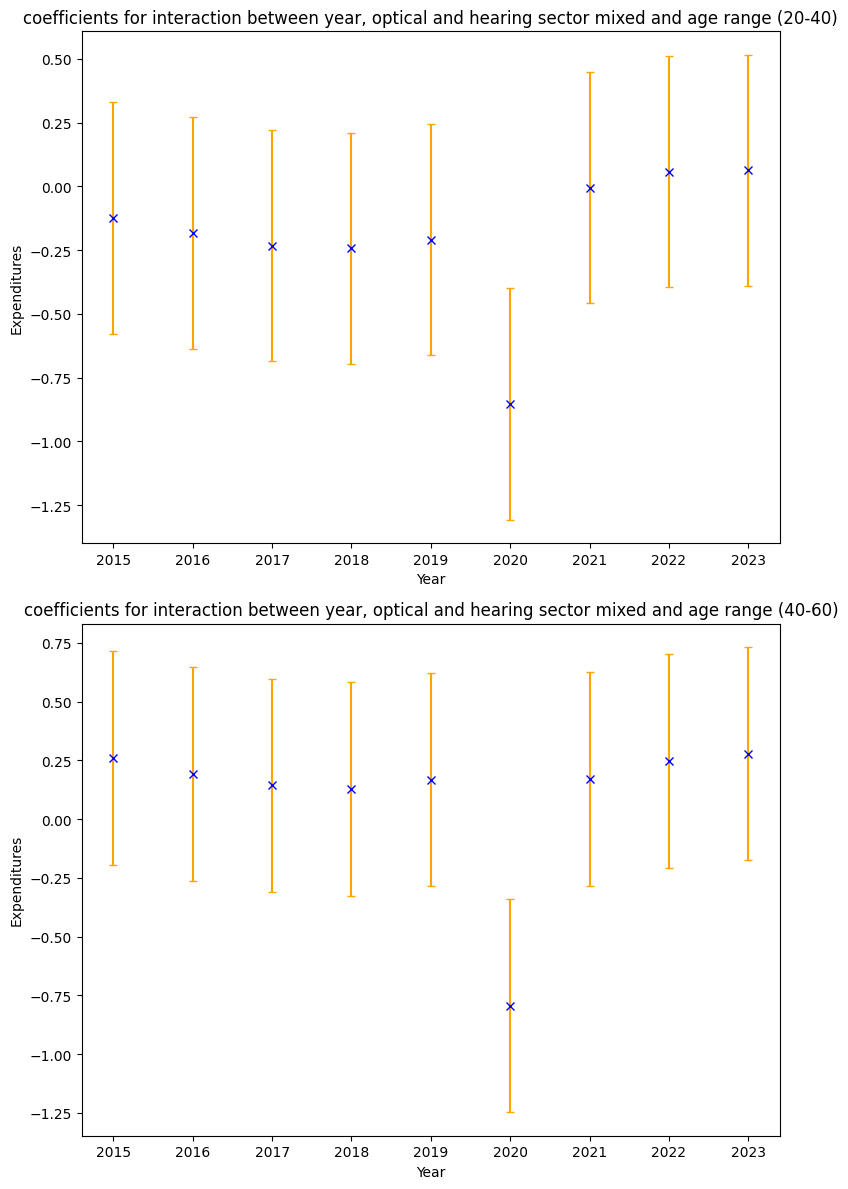

In [255]:
width = 0.35
time_periods = [i+2015 for i in range(9)]
fig, axes = plt.subplots(2, 1, figsize=(8, 12))
axes = axes.flatten()

axes[0].errorbar(time_periods, interact_20_40.iloc[:,0], yerr=interact_20_40_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[0].set_title(
    "coefficients for interaction between year, optical and hearing sector mixed and age range (20-40)"
)

axes[1].errorbar(time_periods, interact_40_60.iloc[:,0], yerr=interact_40_60_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[1].set_title("coefficients for interaction between year, optical and hearing sector mixed and age range (40-60)")

#axes[2].errorbar(time_periods, interact_60_80.iloc[:,0], yerr=interact_60_80_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
#axes[2].set_title("coefficients for interaction between year, optical and hearing sector mixed and age range (60-80)")

for i in range(len(axes)):

    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Expenditures")
    axes[i].set_xticks(time_periods)

plt.tight_layout()
plt.show()

## optical

In [256]:
import statsmodels.api as sm

X = df_aged.drop(columns=(["expenditures"] + [col for col in df_aged.columns if "2014" in col] + [col for col in df_aged.columns if "year" in col and "-" not in col] + [col for col in df_aged.columns if "audio" in col]))
X = sm.add_constant(X)
y = df_aged["expenditures"]

In [257]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           expenditures   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     80.76
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          1.57e-162
Time:                        17:25:15   Log-Likelihood:                -338.99
No. Observations:                 420   AIC:                             764.0
Df Residuals:                     377   BIC:                             937.7
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [258]:
_20_40 = [col for col in X.columns if "20-40" in col]
_20_40.remove("20-40")

_40_60 = [col for col in X.columns if "40-60" in col]
_40_60.remove("40-60")

#_60_80 = [col for col in X.columns if "60-80" in col]
#_60_80.remove("60-80")

In [259]:
params = pd.DataFrame(model.params)
std = pd.DataFrame(model.bse)

In [260]:
interact_20_40 = params[params.index.str.contains("_20-40")]
interact_40_60 = params[params.index.str.contains("_40-60")]
#interact_60_80 = params[params.index.str.contains("_60-80")]

interact_20_40_std = std[std.index.str.contains("_20-40")]
interact_40_60_std = std[std.index.str.contains("_40-60")]
#interact_60_80_std = std[std.index.str.contains("_60-80")]

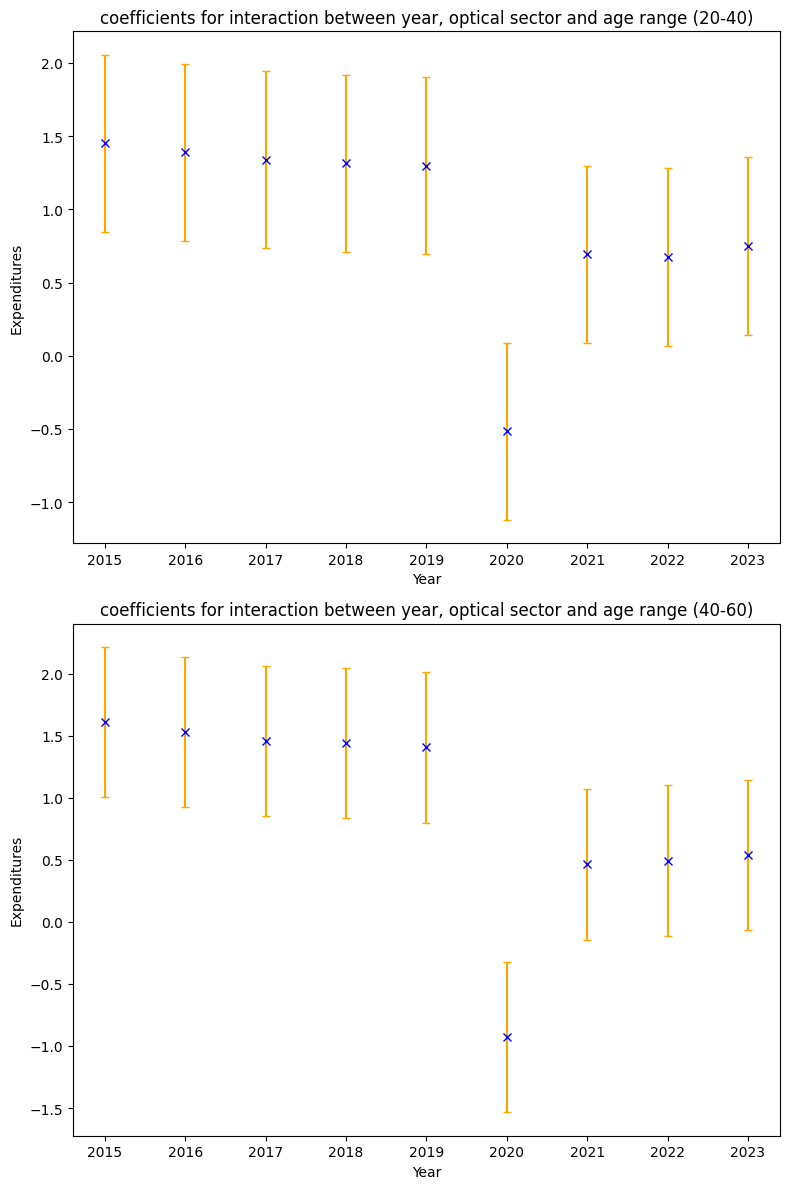

In [261]:
width = 0.35
time_periods = [i+2015 for i in range(9)]
fig, axes = plt.subplots(2, 1, figsize=(8, 12))
axes = axes.flatten()

axes[0].errorbar(time_periods, interact_20_40.iloc[:,0], yerr=interact_20_40_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[0].set_title(
    "coefficients for interaction between year, optical sector and age range (20-40)"
)

axes[1].errorbar(time_periods, interact_40_60.iloc[:,0], yerr=interact_40_60_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[1].set_title("coefficients for interaction between year, optical sector and age range (40-60)")

#axes[2].errorbar(time_periods, interact_60_80.iloc[:,0], yerr=interact_60_80_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
#axes[2].set_title("coefficients for interaction between year, optical and hearing sector mixed and age range (60-80)")

for i in range(len(axes)):

    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Expenditures")
    axes[i].set_xticks(time_periods)

plt.tight_layout()
plt.show()

## hearing

In [262]:
import statsmodels.api as sm

X = df_aged.drop(columns=(["expenditures"] + [col for col in df_aged.columns if "2014" in col] + [col for col in df_aged.columns if "year" in col and "-" not in col] + [col for col in df_aged.columns if "optical" in col or "optique" in col]))
X = sm.add_constant(X)
y = df_aged["expenditures"]

In [263]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           expenditures   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     79.77
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          1.26e-161
Time:                        17:25:15   Log-Likelihood:                -341.33
No. Observations:                 420   AIC:                             768.7
Df Residuals:                     377   BIC:                             942.4
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [264]:
_20_40 = [col for col in X.columns if "20-40" in col]
_20_40.remove("20-40")

_40_60 = [col for col in X.columns if "40-60" in col]
_40_60.remove("40-60")

#_60_80 = [col for col in X.columns if "60-80" in col]
#_60_80.remove("60-80")

In [265]:
params = pd.DataFrame(model.params)
std = pd.DataFrame(model.bse)

In [266]:
interact_20_40 = params[params.index.str.contains("_20-40")]
interact_40_60 = params[params.index.str.contains("_40-60")]
#interact_60_80 = params[params.index.str.contains("_60-80")]

interact_20_40_std = std[std.index.str.contains("_20-40")]
interact_40_60_std = std[std.index.str.contains("_40-60")]
#interact_60_80_std = std[std.index.str.contains("_60-80")]

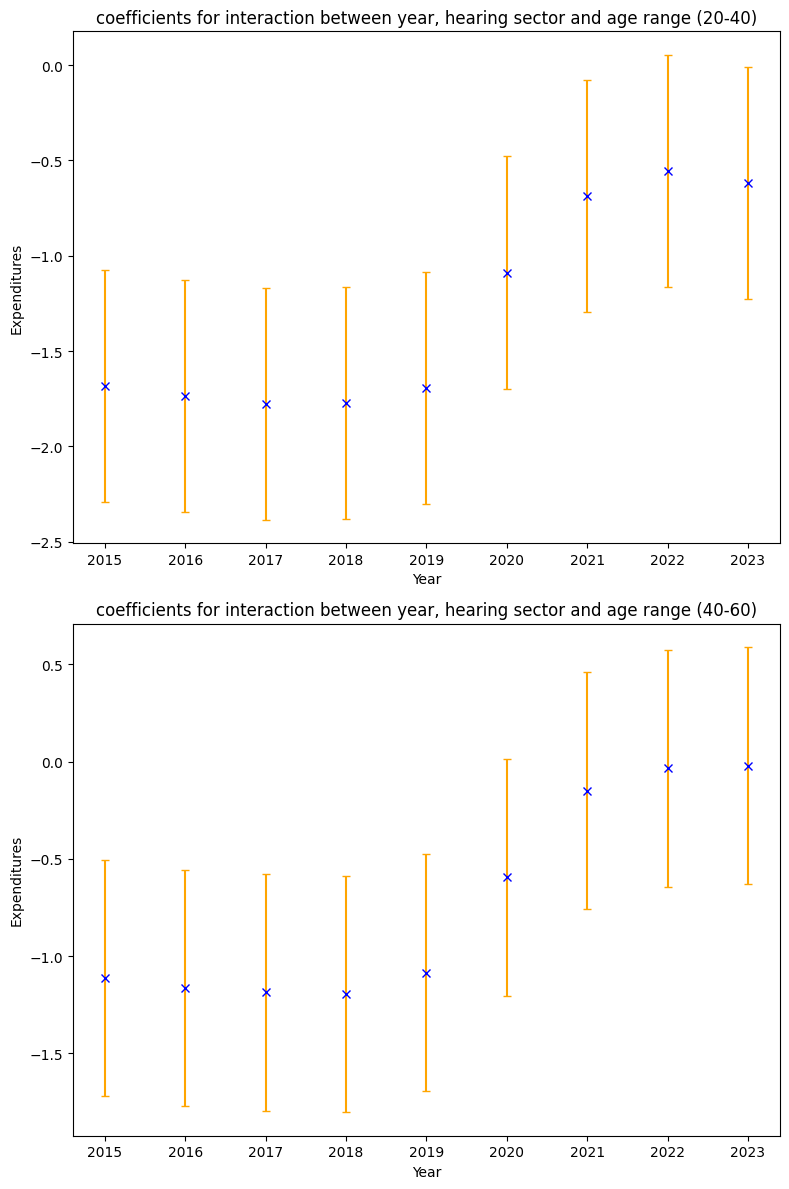

In [267]:
width = 0.35
time_periods = [i+2015 for i in range(9)]
fig, axes = plt.subplots(2, 1, figsize=(8, 12))
axes = axes.flatten()

axes[0].errorbar(time_periods, interact_20_40.iloc[:,0], yerr=interact_20_40_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[0].set_title(
    "coefficients for interaction between year, hearing sector and age range (20-40)"
)

axes[1].errorbar(time_periods, interact_40_60.iloc[:,0], yerr=interact_40_60_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
axes[1].set_title("coefficients for interaction between year, hearing sector and age range (40-60)")

#axes[2].errorbar(time_periods, interact_60_80.iloc[:,0], yerr=interact_60_80_std.iloc[:,0], fmt='x', color='blue', ecolor='orange', capsize=3)
#axes[2].set_title("coefficients for interaction between year, optical and hearing sector mixed and age range (60-80)")

for i in range(len(axes)):

    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Expenditures")
    axes[i].set_xticks(time_periods)

plt.tight_layout()
plt.show()

plot complet

In [268]:
df[10:20]

,expenditures,"ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS",APPAREIL GENERATEUR D AEROSOL,"ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION","AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR",DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS,DMI D ORIGINE SYNTHETIQUE,FAUTEUILS ROULANTS,OPTIQUE MEDICALE,ORTHESES,...,interact. (audio+optical) x year2020,interact. audio x year2021,interact. optique x year2021,interact. (audio+optical) x year2021,interact. audio x year2022,interact. optique x year2022,interact. (audio+optical) x year2022,interact. audio x year2023,interact. optique x year2023,interact. (audio+optical) x year2023
10,18.812256,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11,18.913215,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12,19.016877,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,19.111780,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14,19.195953,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15,19.246226,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,19.133334,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17,19.298131,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18,19.360035,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19,19.411766,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'ALL group controls')

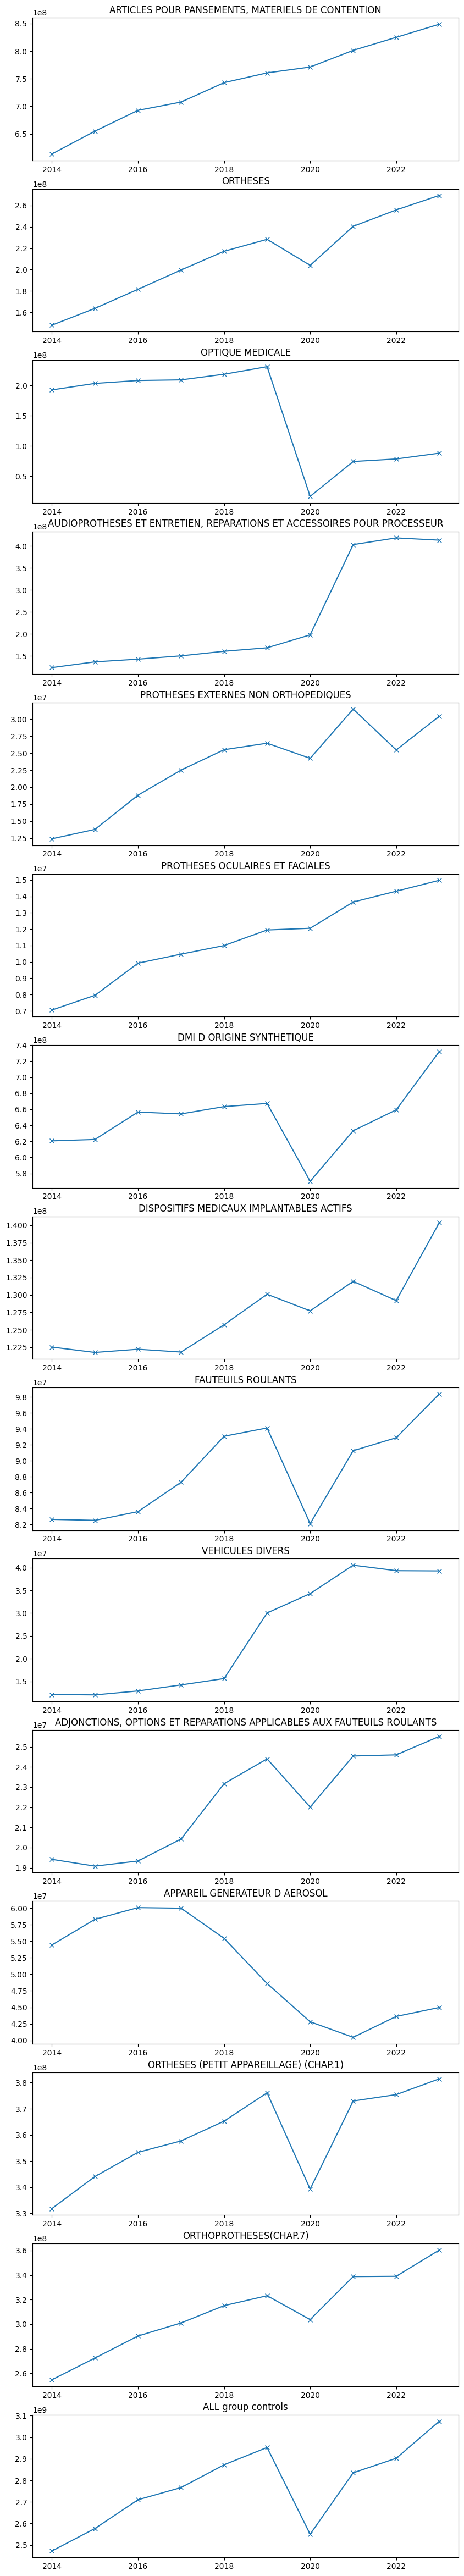

In [269]:
df = pd.read_excel("df_without_age_range_for_reg_30-10.xlsx", index_col=0)

time_periods = [i+2014 for i in range(10)]
fig, axes = plt.subplots(15, 1, figsize=(10, 60))
axes = axes.flatten()

subset = df.iloc[i:i+10]

col_with_1 = subset.eq(1).any(axis=0).idxmax()

for j in range(len(axes)-1):
    subset = df[j*10:j*10+10]
    col_with_1 = subset.eq(1).any(axis=0).idxmax()

    axes[j].plot(time_periods, df[j*10:j*10+10]["expenditures"], marker="x")
    axes[j].set_title(col_with_1)

df_without_optical_n_hearing = df[df["OPTIQUE MEDICALE"]!=1]
df_without_optical_n_hearing = df[df["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"]!=1]

dico = {}
for i in time_periods:
    dico[i] = df_without_optical_n_hearing[df_without_optical_n_hearing[str(i)]==1]["expenditures"].sum()

axes[14].plot(time_periods, dico.values(), marker="x")
axes[14].set_title("ALL group controls")

----------------------------

Separation between class A and no class A - *optical*

In [303]:
df = pd.read_excel("df_without_age_range_for_reg_30-10.xlsx", index_col=0)

In [304]:
with open(
    "../data/results/gov_exp_'VERRE(S)'_noclassA.json", "r", encoding="utf-8"
) as f:
    v_o_noA = json.load(f)
with open(
    "../data/results/gov_exp_'MONTURE'_noclassA.json", "r", encoding="utf-8"
) as f:
    m_o_noA = json.load(f)
with open("../data/results/gov_exp_classA_glasses.json", "r", encoding="utf-8") as f:
    classA_v_o = json.load(f)
with open("../data/results/gov_exp_classA_frames.json", "r", encoding="utf-8") as f:
    classA_m_o = json.load(f)
with open("../data/results/gov_exp_'VERRE(S)'.json", "r", encoding="utf-8") as f:
    v_o = json.load(f)
with open("../data/results/gov_exp_'MONTURE'.json", "r", encoding="utf-8") as f:
    m_o = json.load(f)

In [305]:
opticalA = classA_m_o + classA_v_o
opticalnoA = m_o_noA + v_o_noA

In [306]:
#for i in range(6):
#    opticalA[0][str(i+2014)] = 1
#A = pd.DataFrame(
#    {
#        "year" : opticalA[0].keys(),
#        "expenditures" : opticalA[0].values(),
#        "optique classe A" : [1 for i in range(len(opticalA[0].keys()))]
#    }
#)
#
#A = pd.get_dummies(A, columns=['year'], prefix='', prefix_sep='').astype(int)

In [307]:
noA = pd.DataFrame(
    {
        "year" : opticalnoA[0].keys(),
        "expenditures" : opticalnoA[0].values(),
        "optique out of classe A" : [1 for i in range(len(opticalnoA[0].keys()))]
    }
)

noA = pd.get_dummies(noA, columns=['year'], prefix='', prefix_sep='').astype(int)

In [308]:
#df = pd.concat([df, A], axis=0)
df = pd.concat([df, noA], axis=0)

In [309]:
df = df.fillna(0)
df = df.drop(columns='OPTIQUE MEDICALE')
df.columns

Index(['expenditures',
       'ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS',
       'APPAREIL GENERATEUR D AEROSOL',
       'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION',
       'AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR',
       'DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS', 'DMI D ORIGINE SYNTHETIQUE',
       'FAUTEUILS ROULANTS', 'ORTHESES',
       'ORTHESES (PETIT APPAREILLAGE) (CHAP.1)', 'ORTHOPROTHESES(CHAP.7)',
       'PROTHESES EXTERNES NON ORTHOPEDIQUES',
       'PROTHESES OCULAIRES ET FACIALES', 'VEHICULES DIVERS', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       'interact. audio x year2014', 'interact. optique x year2014',
       'interact. (audio+optical) x year2014', 'interact. audio x year2015',
       'interact. optique x year2015', 'interact. (audio+optical) x year2015',
       'interact. audio x year2016', 'interact. optique x year2016',
       'interact. (audio+opt

In [310]:
to_remove = [col for col in df.filter(like="interact.").columns]
df = df.drop(columns=to_remove)

In [311]:
df.columns

Index(['expenditures',
       'ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS',
       'APPAREIL GENERATEUR D AEROSOL',
       'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION',
       'AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR',
       'DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS', 'DMI D ORIGINE SYNTHETIQUE',
       'FAUTEUILS ROULANTS', 'ORTHESES',
       'ORTHESES (PETIT APPAREILLAGE) (CHAP.1)', 'ORTHOPROTHESES(CHAP.7)',
       'PROTHESES EXTERNES NON ORTHOPEDIQUES',
       'PROTHESES OCULAIRES ET FACIALES', 'VEHICULES DIVERS', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       'optique out of classe A'],
      dtype='object')

In [312]:
for col in df.filter(like="20").columns:
    df[f"interact. outofClassA x {col}"] = df[col] * df["optique out of classe A"]

In [313]:
df["expenditures"] = np.log(df["expenditures"])

                            OLS Regression Results                            
Dep. Variable:           expenditures   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     107.9
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           1.43e-72
Time:                        17:32:07   Log-Likelihood:                -20.478
No. Observations:                 150   AIC:                             107.0
Df Residuals:                     117   BIC:                             206.3
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

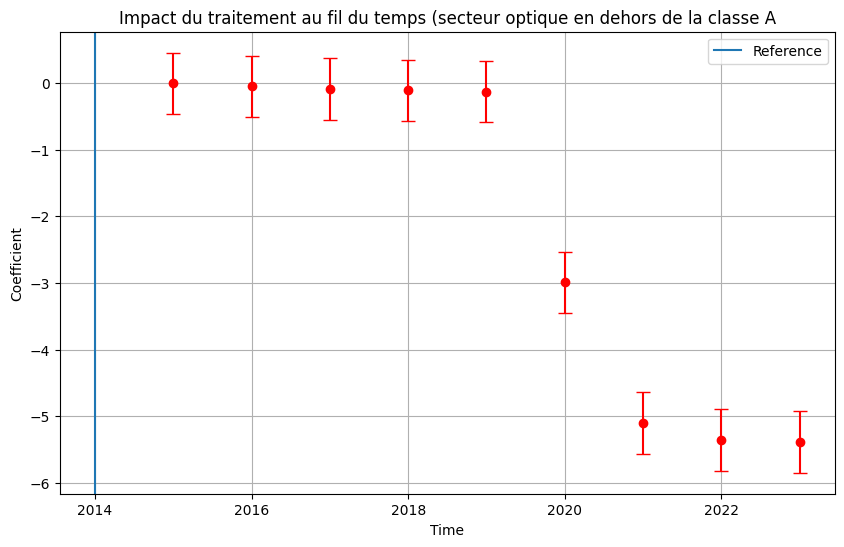

In [323]:
import statsmodels.api as sm

X = df.drop(columns=(["expenditures"] + [col for col in df.columns if "2014" in col]))
X = sm.add_constant(X)
y = df["expenditures"]
model = sm.OLS(y, X).fit()
print(model.summary())
time_periods = [i+2015 for i in range(9)]
coefficients = model.params[-9:]
std_errors = model.bse[-9:]


plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("Impact du traitement au fil du temps (secteur optique en dehors de la classe A")
plt.axvline(x=2014, label="Reference")
plt.grid(True)

plt.legend()
plt.show()

In [314]:
import statsmodels.api as sm

X = df.drop(columns=(["expenditures"] + [col for col in df.columns if "2020" in col]))
X = sm.add_constant(X)
y = df["expenditures"]
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           expenditures   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     107.9
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           1.43e-72
Time:                        17:27:40   Log-Likelihood:                -20.478
No. Observations:                 150   AIC:                             107.0
Df Residuals:                     117   BIC:                             206.3
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

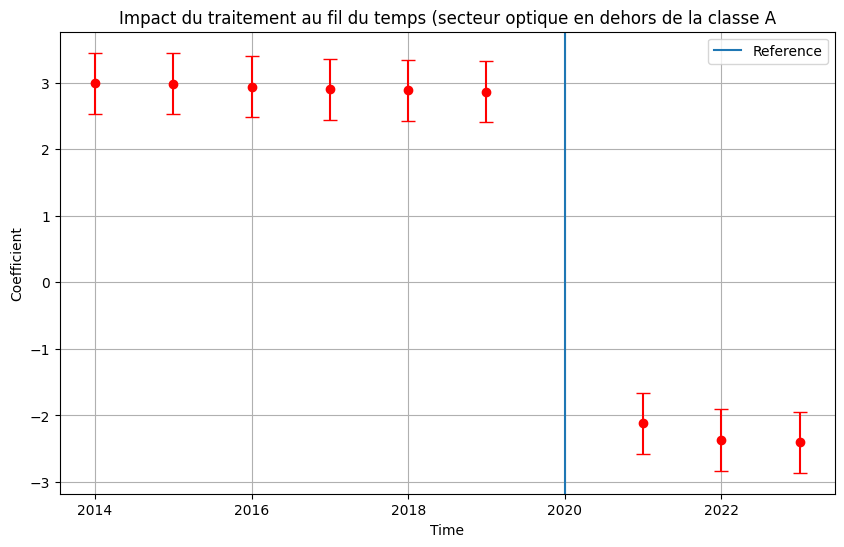

In [ ]:
time_periods = [i+2014 for i in range(6)] + [i+2021 for i in range(3)]
coefficients = model.params[-9:]
std_errors = model.bse[-9:]


plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("Impact du traitement au fil du temps (secteur optique en dehors de la classe A)")
plt.axvline(x=2020, label="Reference")
plt.grid(True)

plt.legend()
plt.show()

Separation between class I and no class II - *hearing*

In [283]:
df = pd.read_excel("df_without_age_range_for_reg_30-10.xlsx", index_col=0)

In [284]:
hearing = gov_exp(
    inflation_adjustment=False,
    sector="hearing",
    mask={"AUDIOPROTHESES" : ["contains", "L_SC1", "and"]
    },
    indent=0,
)

In [285]:
hearingI = gov_exp(
    inflation_adjustment=False,
    sector="hearing",
    mask={"AUDIOPROTHESES" : ["contains", "L_SC1", "and"],
        "CLASSE I" : ["contains", "L_CODE_LPP", "and"],
    },
    indent=0,
)

In [286]:
hearing = hearing[0]
hearingI = hearingI[0]

In [287]:
hearing

{'2014': 123379125.63999999,
 '2015': 136419492.47,
 '2016': 142546773.39,
 '2017': 150039692.48,
 '2018': 160459026.97,
 '2019': 168361915.23999998,
 '2020': 197756484.45,
 '2021': 402905867.34,
 '2022': 418147950.65999997,
 '2023': 412981551.66999996}

In [288]:
liste = []
for i in range(len(hearing)):
    liste.append([list(hearing.values())[i], list(hearingI.values())[i]])

hearing_noI_list = []

for tuple in liste:
    value1, value2 = tuple
    hearing_noI_list.append(value1 - value2)

In [289]:
hearing_noI_list

[123379125.63999999,
 136419492.47,
 142546773.39,
 150039692.48,
 160459026.97,
 168313063.23999998,
 197747988.45,
 276399607.96,
 287192300.1999999,
 291915421.0]

In [290]:
hearing_noI = {}
for i in range(10):
    hearing_noI[i+2014] = hearing_noI_list[i]

In [291]:
#for i in range(6):
#    opticalA[0][str(i+2014)] = 1
#A = pd.DataFrame(
#    {
#        "year" : opticalA[0].keys(),
#        "expenditures" : opticalA[0].values(),
#        "optique classe A" : [1 for i in range(len(opticalA[0].keys()))]
#    }
#)
#
#A = pd.get_dummies(A, columns=['year'], prefix='', prefix_sep='').astype(int)

In [292]:
noI = pd.DataFrame(
    {
        "year" : hearing_noI.keys(),
        "expenditures" : hearing_noI.values(),
        "hearing out of classe I" : [1 for i in range(len(hearing_noI.keys()))]
    }
)

noI = pd.get_dummies(noI, columns=['year'], prefix='', prefix_sep='').astype(int)

In [293]:
#df = pd.concat([df, A], axis=0)
df = pd.concat([df, noI], axis=0)

In [294]:
df = df.fillna(0)
df = df.drop(columns='AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR')
df.columns

Index(['expenditures',
       'ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS',
       'APPAREIL GENERATEUR D AEROSOL',
       'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION',
       'DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS', 'DMI D ORIGINE SYNTHETIQUE',
       'FAUTEUILS ROULANTS', 'OPTIQUE MEDICALE', 'ORTHESES',
       'ORTHESES (PETIT APPAREILLAGE) (CHAP.1)', 'ORTHOPROTHESES(CHAP.7)',
       'PROTHESES EXTERNES NON ORTHOPEDIQUES',
       'PROTHESES OCULAIRES ET FACIALES', 'VEHICULES DIVERS', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       'interact. audio x year2014', 'interact. optique x year2014',
       'interact. (audio+optical) x year2014', 'interact. audio x year2015',
       'interact. optique x year2015', 'interact. (audio+optical) x year2015',
       'interact. audio x year2016', 'interact. optique x year2016',
       'interact. (audio+optical) x year2016', 'interact. audio x year2017',
       'inter

In [295]:
to_remove = [col for col in df.filter(like="interact.").columns]
df = df.drop(columns=to_remove)

In [296]:
df.columns

Index(['expenditures',
       'ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS',
       'APPAREIL GENERATEUR D AEROSOL',
       'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION',
       'DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS', 'DMI D ORIGINE SYNTHETIQUE',
       'FAUTEUILS ROULANTS', 'OPTIQUE MEDICALE', 'ORTHESES',
       'ORTHESES (PETIT APPAREILLAGE) (CHAP.1)', 'ORTHOPROTHESES(CHAP.7)',
       'PROTHESES EXTERNES NON ORTHOPEDIQUES',
       'PROTHESES OCULAIRES ET FACIALES', 'VEHICULES DIVERS', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       'hearing out of classe I'],
      dtype='object')

In [297]:
for col in df.filter(like="20").columns:
    df[f"interact. outofClassI x {col}"] = df[col] * df["hearing out of classe I"]

In [298]:
df["expenditures"] = np.log(df["expenditures"])

In [301]:
import statsmodels.api as sm

X = df.drop(columns=(["expenditures"] + [col for col in df.columns if "2020" in col]))
X = sm.add_constant(X)
y = df["expenditures"]
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           expenditures   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     76.94
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           2.16e-64
Time:                        17:26:47   Log-Likelihood:                -20.478
No. Observations:                 150   AIC:                             107.0
Df Residuals:                     117   BIC:                             206.3
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

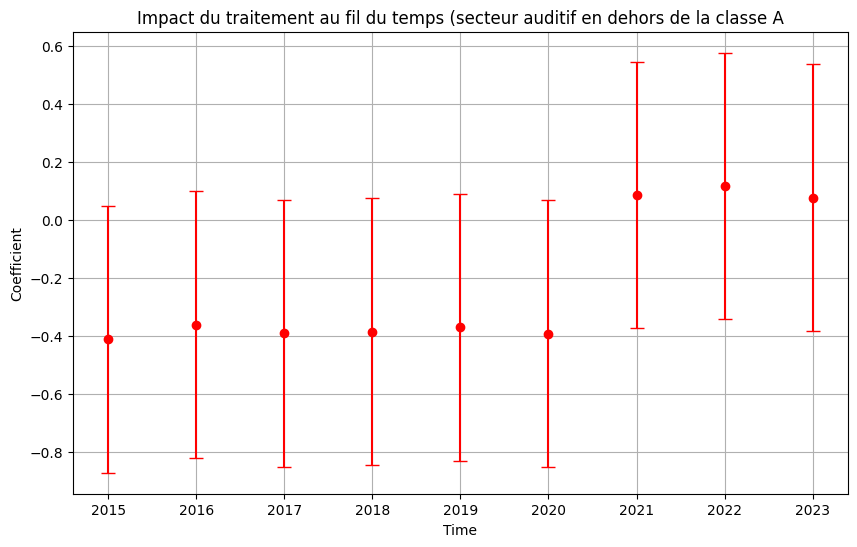

In [302]:
time_periods = [i+2015 for i in range(9)]
coefficients = model.params[-9:]
std_errors = model.bse[-9:]


plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("Impact du traitement au fil du temps (secteur auditif en dehors de la classe A")
plt.grid(True)

plt.show()

dental field

In [32]:
dental_entire = {'2015': 942153535.0543488, #we considered only titles who were about prothesis (all titles on my own xlsx)
 '2016': 958887855.2785015,
 '2017': 960577201.3185228,
 '2018': 1041483786.4385223,
 '2019': 873987114.599595,
 '2020': 883295478.3399956,
 '2021': 1113581801.500007,
 '2022': 1120383325.179998,
 '2023': 1122418365.1999922}

In [33]:
dental_cent_santé = {'2015': 751594657.8665309,
 '2016': 757689659.4084992,
 '2017': 754938625.5185189,
 '2018': 823219205.6585141,
 '2019': 503954864.6195948,
 '2020': 489067316.8199984,
 '2021': 639695631.1500076,
 '2022': 633746522.7299972,
 '2023': 627124778.9899879}

In [34]:
dental_no_cent = {'2015': 190558877.18781793,
 '2016': 201198195.87000227,
 '2017': 205638575.8000039,
 '2018': 218264580.7800082,
 '2019': 370032249.98000014,
 '2020': 394228161.51999724,
 '2021': 473886170.3499993,
 '2022': 486636802.45000076,
 '2023': 495293586.2100043}

In [35]:
df = pd.read_excel("df_without_age_range_for_reg_30-10.xlsx", index_col=0)

In [36]:
dental_cent_santé = pd.DataFrame(
    {
        "year" : dental_cent_santé.keys(),
        "expenditures" : dental_cent_santé.values(),
        "dental_100%_Sante" : [1 for i in range(len(dental_cent_santé.keys()))]
    }
)

dental_cent_santé = pd.get_dummies(dental_cent_santé, columns=['year'], prefix='', prefix_sep='').astype(int)

In [37]:
#df = pd.concat([df, A], axis=0)
df = pd.concat([df, dental_cent_santé], axis=0)

In [38]:
df = df.fillna(0)
df.columns

Index(['expenditures',
       'ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS',
       'APPAREIL GENERATEUR D AEROSOL',
       'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION',
       'AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR',
       'DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS', 'DMI D ORIGINE SYNTHETIQUE',
       'FAUTEUILS ROULANTS', 'OPTIQUE MEDICALE', 'ORTHESES',
       'ORTHESES (PETIT APPAREILLAGE) (CHAP.1)', 'ORTHOPROTHESES(CHAP.7)',
       'PROTHESES EXTERNES NON ORTHOPEDIQUES',
       'PROTHESES OCULAIRES ET FACIALES', 'VEHICULES DIVERS', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       'interact. audio x year2014', 'interact. optique x year2014',
       'interact. (audio+optical) x year2014', 'interact. audio x year2015',
       'interact. optique x year2015', 'interact. (audio+optical) x year2015',
       'interact. audio x year2016', 'interact. optique x year2016',
       '

In [39]:
to_remove = [col for col in df.filter(like="interact.").columns]
df = df.drop(columns=to_remove)

In [40]:
df.columns

Index(['expenditures',
       'ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS',
       'APPAREIL GENERATEUR D AEROSOL',
       'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION',
       'AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR',
       'DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS', 'DMI D ORIGINE SYNTHETIQUE',
       'FAUTEUILS ROULANTS', 'OPTIQUE MEDICALE', 'ORTHESES',
       'ORTHESES (PETIT APPAREILLAGE) (CHAP.1)', 'ORTHOPROTHESES(CHAP.7)',
       'PROTHESES EXTERNES NON ORTHOPEDIQUES',
       'PROTHESES OCULAIRES ET FACIALES', 'VEHICULES DIVERS', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       'dental_100%_Sante'],
      dtype='object')

In [41]:
df = df.drop(columns=["2014"])

In [42]:
for col in df.filter(like="20").columns:
    df[f"interact. dental100sante x {col}"] = df[col] * df["dental_100%_Sante"]

In [43]:
df["expenditures"] = np.log(df["expenditures"])

In [44]:
import statsmodels.api as sm

X = df.drop(columns=(["expenditures"] + [col for col in df.columns if "2020" in col] + [col for col in df.columns if "2014" in col] + [col for col in df.columns if "audio" in col.lower() or "optique" in col.lower()]))
X = sm.add_constant(X)
y = df["expenditures"]
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           expenditures   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     84.51
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           3.89e-66
Time:                        08:58:53   Log-Likelihood:                -29.298
No. Observations:                 149   AIC:                             118.6
Df Residuals:                     119   BIC:                             208.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

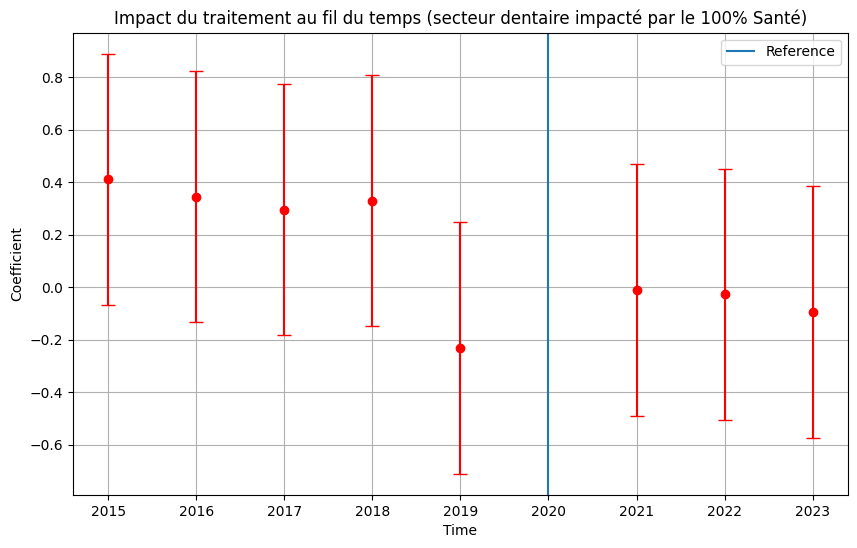

In [46]:
time_periods = [i+2015 for i in range(5)] + [i+2021 for i in range(3)]
coefficients = model.params[-8:]
std_errors = model.bse[-8:]


plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("Impact du traitement au fil du temps (secteur dentaire impacté par le 100% Santé)")
plt.axvline(x=2020, label="Reference")
plt.grid(True)

plt.legend()
plt.show()

interaction between the 3 sectors

In [65]:
dental_entire = {'2015': 942153535.0543488, #we considered only titles who were about prothesis (all titles on my own xlsx)
 '2016': 958887855.2785015,
 '2017': 960577201.3185228,
 '2018': 1041483786.4385223,
 '2019': 873987114.599595,
 '2020': 883295478.3399956,
 '2021': 1113581801.500007,
 '2022': 1120383325.179998,
 '2023': 1122418365.1999922}

In [66]:
dental_cent_santé = {'2015': 751594657.8665309,
 '2016': 757689659.4084992,
 '2017': 754938625.5185189,
 '2018': 823219205.6585141,
 '2019': 503954864.6195948,
 '2020': 489067316.8199984,
 '2021': 639695631.1500076,
 '2022': 633746522.7299972,
 '2023': 627124778.9899879}

In [67]:
dental_no_cent = {'2015': 190558877.18781793,
 '2016': 201198195.87000227,
 '2017': 205638575.8000039,
 '2018': 218264580.7800082,
 '2019': 370032249.98000014,
 '2020': 394228161.51999724,
 '2021': 473886170.3499993,
 '2022': 486636802.45000076,
 '2023': 495293586.2100043}

In [68]:
df = pd.read_excel("df_without_age_range_for_reg_30-10.xlsx", index_col=0)

In [69]:
dental_cent_santé = pd.DataFrame(
    {
        "year" : dental_cent_santé.keys(),
        "expenditures" : dental_cent_santé.values(),
        "dental_100%_Sante" : [1 for i in range(len(dental_cent_santé.keys()))]
    }
)

dental_cent_santé = pd.get_dummies(dental_cent_santé, columns=['year'], prefix='', prefix_sep='').astype(int)

In [70]:
#df = pd.concat([df, A], axis=0)
df = pd.concat([df, dental_cent_santé], axis=0)

In [71]:
df = df.fillna(0)
df.columns

Index(['expenditures',
       'ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS',
       'APPAREIL GENERATEUR D AEROSOL',
       'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION',
       'AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR',
       'DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS', 'DMI D ORIGINE SYNTHETIQUE',
       'FAUTEUILS ROULANTS', 'OPTIQUE MEDICALE', 'ORTHESES',
       'ORTHESES (PETIT APPAREILLAGE) (CHAP.1)', 'ORTHOPROTHESES(CHAP.7)',
       'PROTHESES EXTERNES NON ORTHOPEDIQUES',
       'PROTHESES OCULAIRES ET FACIALES', 'VEHICULES DIVERS', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       'interact. audio x year2014', 'interact. optique x year2014',
       'interact. (audio+optical) x year2014', 'interact. audio x year2015',
       'interact. optique x year2015', 'interact. (audio+optical) x year2015',
       'interact. audio x year2016', 'interact. optique x year2016',
       '

In [72]:
to_remove = [col for col in df.filter(like="interact.").columns]
df = df.drop(columns=to_remove)

In [73]:
df.columns
df = df.drop(columns=["2014"])

In [74]:
for col in df.filter(like="20").columns:
    df[f"interact. (audio + optical + dental100%santé) x {col}"] = df[col] * ((df["dental_100%_Sante"]) + df["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR"] + df["OPTIQUE MEDICALE"])

In [75]:
df["expenditures"] = np.log(df["expenditures"])

In [76]:
import statsmodels.api as sm

X = df.drop(columns=(["expenditures"] + [col for col in df.columns if "2020" in col])) #+ #[col for col in df.columns if "audioprot" in col.lower() or "optique" in col.lower()]))
X = sm.add_constant(X)
y = df["expenditures"]
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           expenditures   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     96.49
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.05e-69
Time:                        15:15:41   Log-Likelihood:                -16.825
No. Observations:                 149   AIC:                             95.65
Df Residuals:                     118   BIC:                             188.8
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

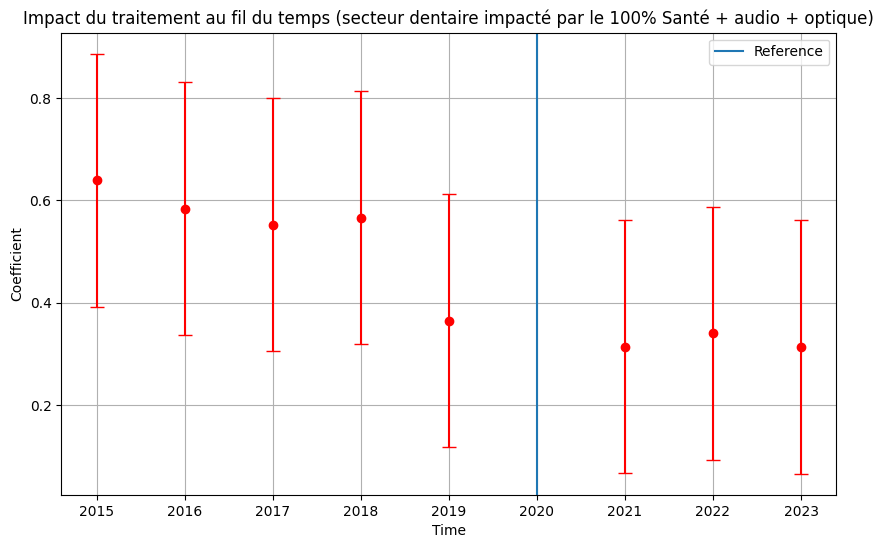

In [77]:
time_periods = [i+2015 for i in range(5)] + [i+2021 for i in range(3)]
coefficients = model.params[-8:]
std_errors = model.bse[-8:]


plt.figure(figsize=(10, 6))

plt.errorbar(time_periods, coefficients, yerr=std_errors, fmt='o', color='red', ecolor='red', capsize=5)

plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title("Impact du traitement au fil du temps (secteur dentaire impacté par le 100% Santé + audio + optique)")
plt.axvline(x=2020, label="Reference")
plt.grid(True)

plt.legend()
plt.show()